In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('./wine.csv')

In [7]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [35]:
#features = df.drop('Wine', axis=1)

x = df.iloc[:,1:].values
y = df.iloc[:,0].values



In [37]:
x = StandardScaler().fit_transform(x)

In [55]:
x.shape

(178, 13)

In [56]:
pca=PCA(n_components=1)
princinpalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=princinpalComponents,columns=['PC1'])

In [57]:
principalDf.head()

,PC1
0,3.316751
1,2.209465
2,2.516740
3,3.757066
4,1.008908


In [41]:
finalDf=pd.concat([principalDf,df[['Wine']]],axis=1)

In [58]:
finalDf.head()

,PC1,Wine
0,3.316751,1
1,2.209465,1
2,2.516740,1
3,3.757066,1
4,1.008908,1


In [59]:
finalDf.shape

(178, 2)

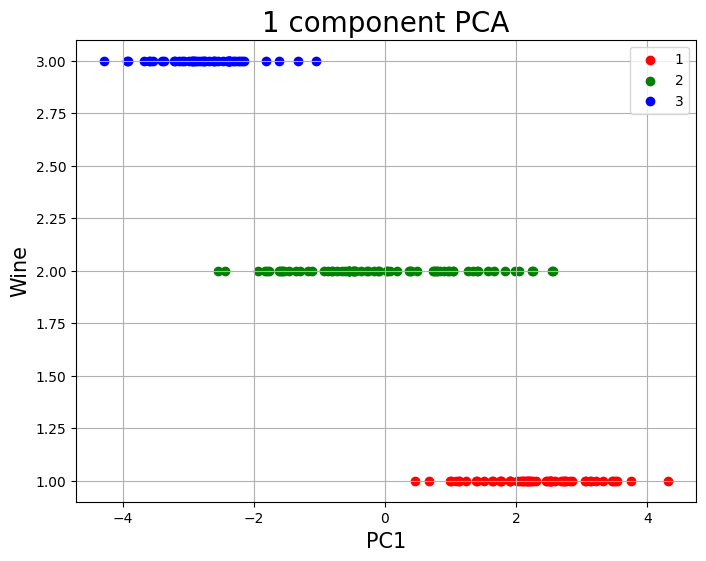

In [60]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('Wine',fontsize=15)
ax.set_title('1 component PCA',fontsize=20)

targets = [1,2,3]
colors = ['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['Wine'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'PC1'],finalDf.loc[indicesToKeep,'Wine'],c=color)

ax.legend(targets)
ax.grid()

